# SVC |forestfire_data

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Data

In [55]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [56]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

### EDA

In [57]:
#Lets drop the encoded colums and visualize our data
df1=df.drop(df.iloc[:,11:30],axis=1)
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


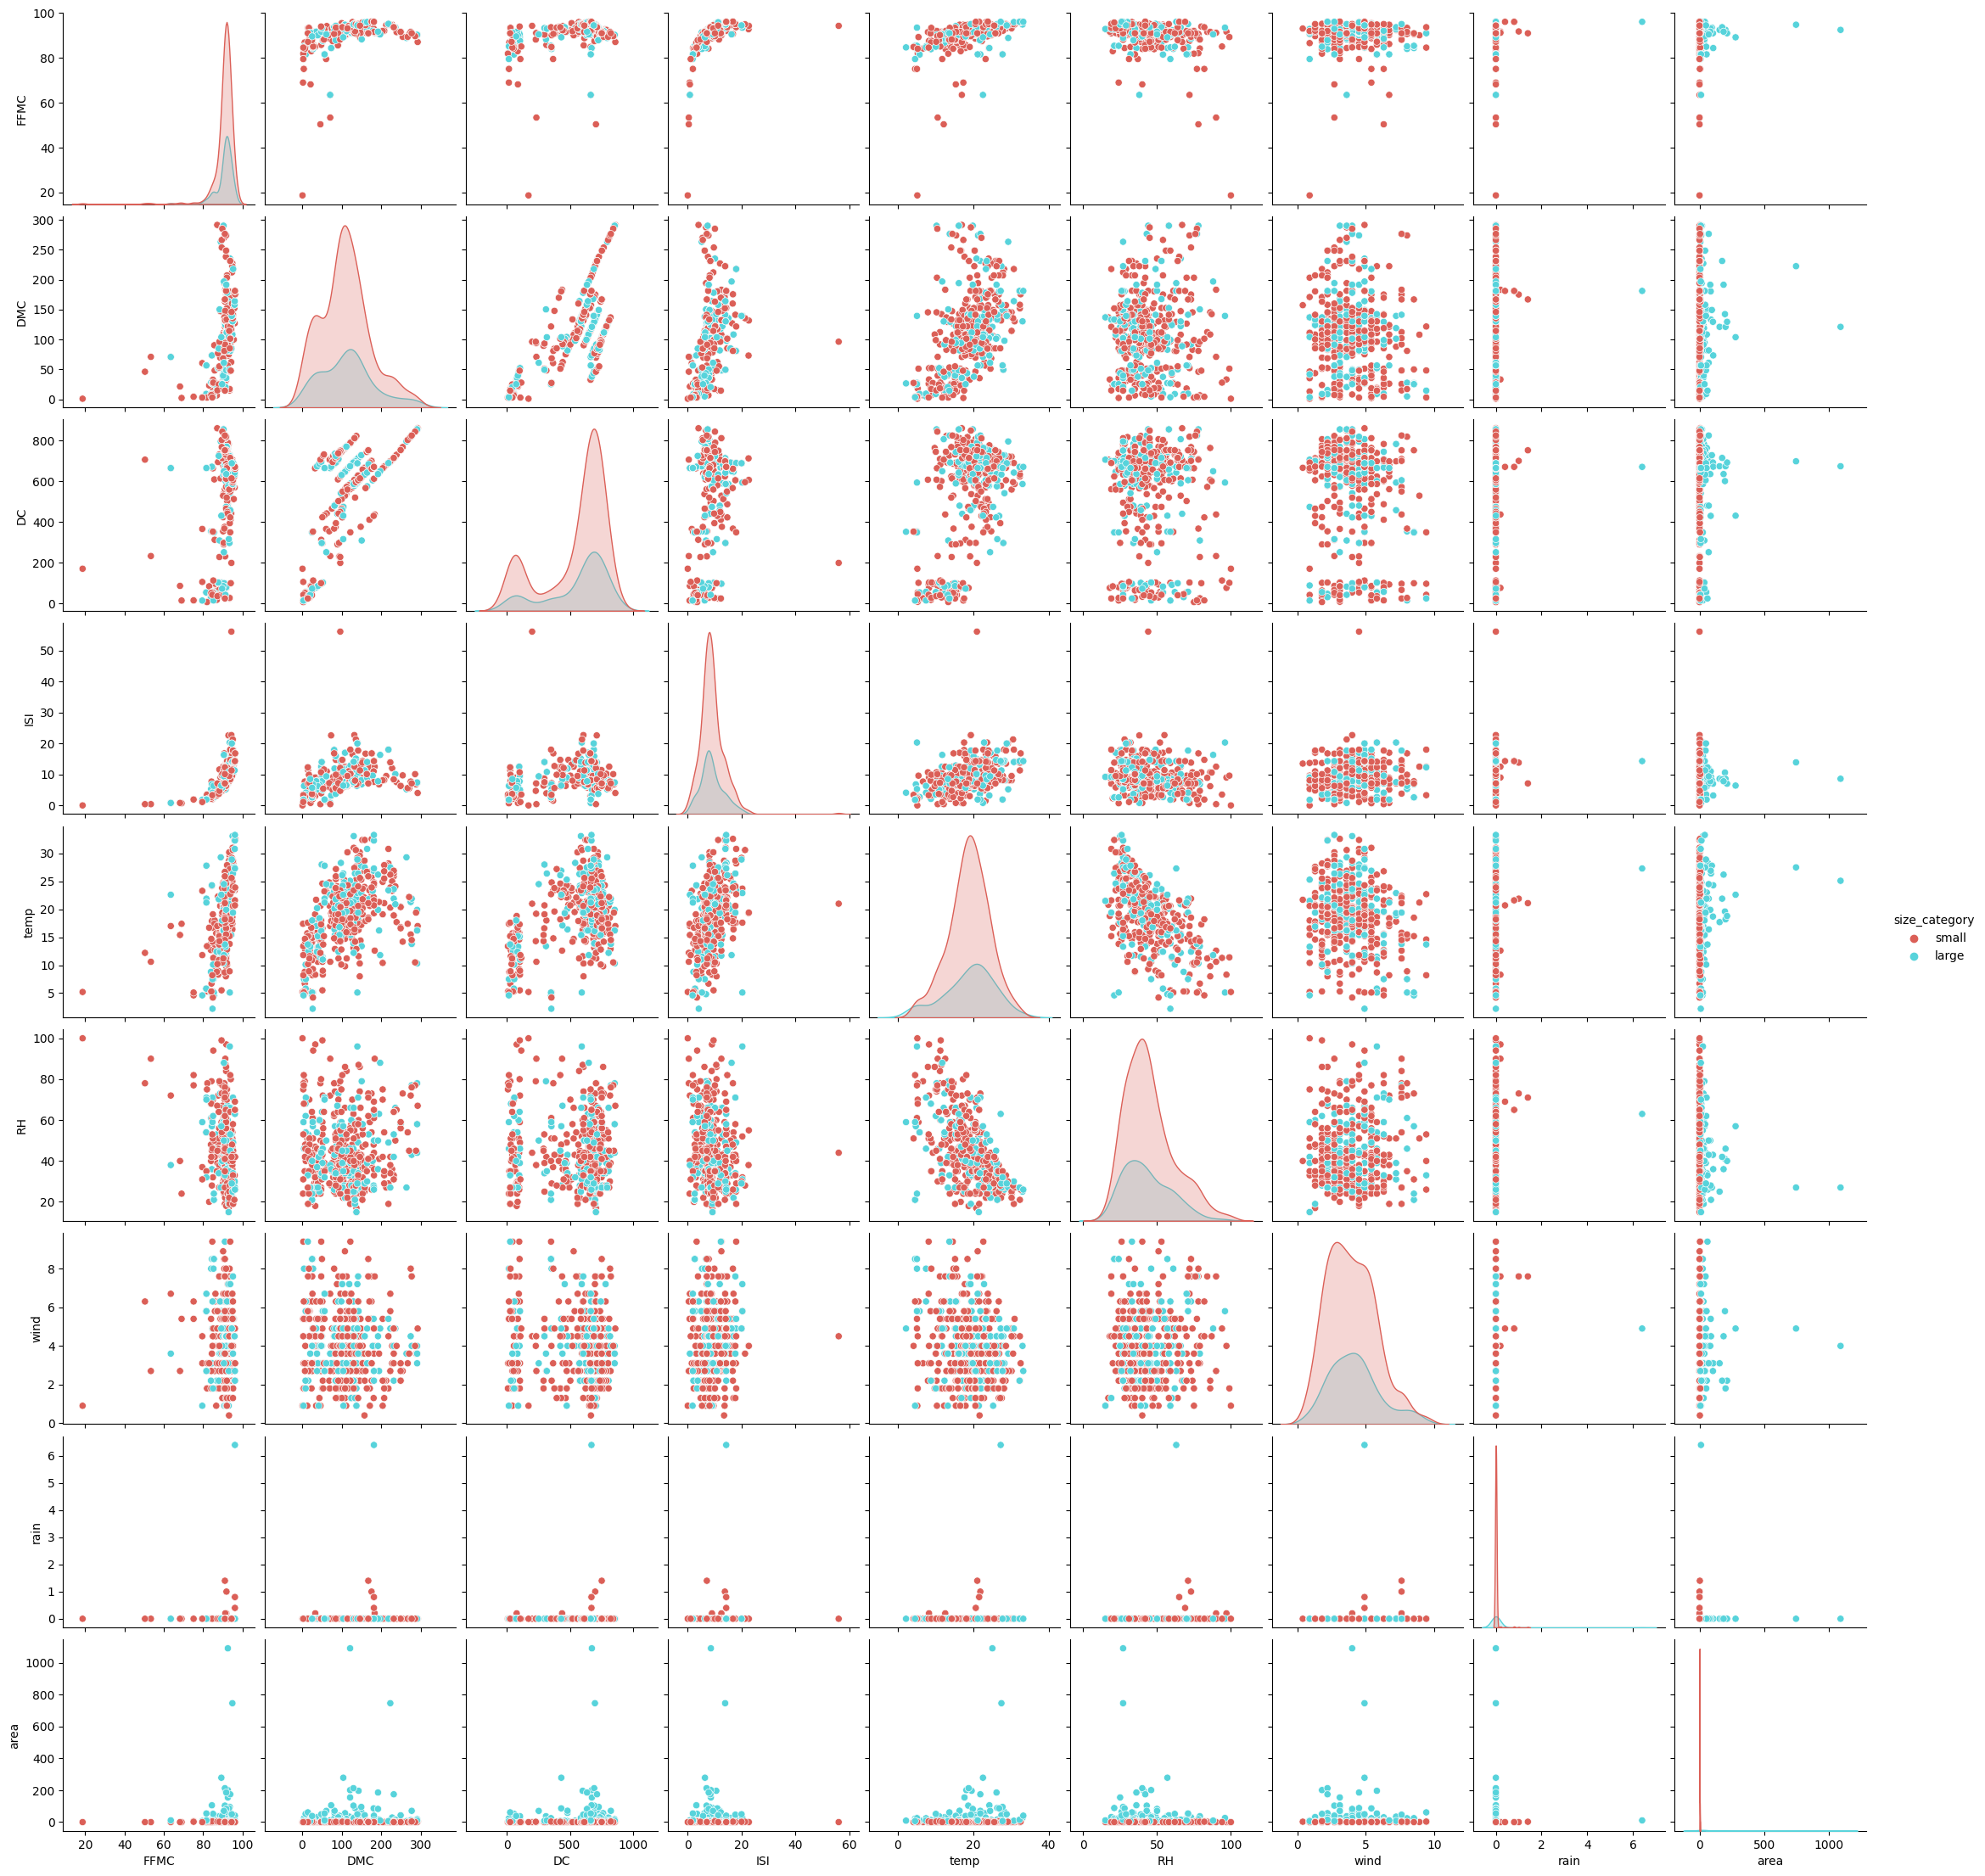

In [58]:
sns.pairplot(df1,hue='size_category',palette='hls')

#### Data distribution is satisfactory.Category 'small' is Majority class. Lets see the target distribution

<Axes: xlabel='size_category', ylabel='count'>

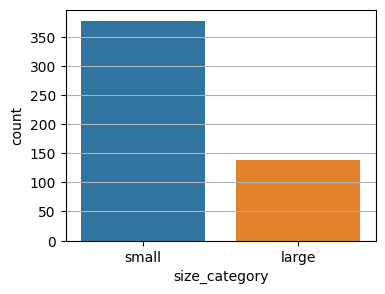

In [27]:
plt.figure(figsize=(4,3))
plt.grid()
sns.countplot(df1,x='size_category')



#### There is no heavy imbalance in the target classification

C:\Users\rakes\AppData\Local\Temp\ipykernel_12528\626973064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

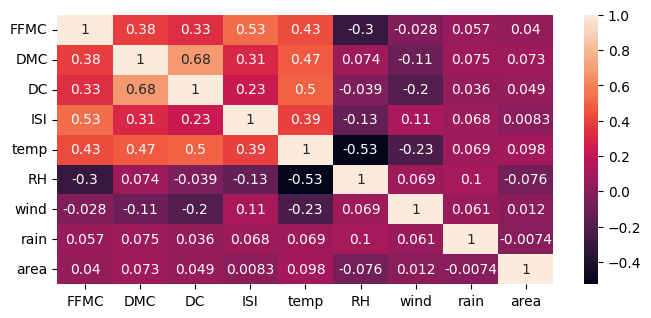

In [25]:
plt.figure(figsize=(8,3.5))
sns.heatmap(df1.corr(),annot=True)

#### No considerable multicollinearity found

In [59]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### No missing values

### Data Preprocessing

In [60]:
#month and day is already encoded. lets drop these colums
df.drop(['month','day'],axis=1,inplace=True)
df.shape

(517, 29)

In [61]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [71]:
#Split into target and features
X=df.iloc[:,0:28]
X.head()
y.shape

(517,)

In [72]:
y=df['size_category']
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

#### Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

### SVC Modelling

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### 1. Kernel='rbf'

In [66]:
svc_rbf=SVC(kernel='rbf')

In [75]:
svc_rbf.fit(X_train,y_train)

SVC()

In [76]:
#prediction
y_pred1=svc_rbf.predict(X_test)

In [78]:
#Confusion matrix
confusion_matrix(y_test,y_pred1)

array([[ 4, 27],
       [ 0, 73]], dtype=int64)

In [79]:
pd.crosstab(y_test,y_pred1)

col_0,large,small
size_category,,
large,4,27
small,0,73


In [81]:
#Classification Report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       large       1.00      0.13      0.23        31
       small       0.73      1.00      0.84        73

    accuracy                           0.74       104
   macro avg       0.86      0.56      0.54       104
weighted avg       0.81      0.74      0.66       104



#### 2. Kernel='linear'

In [85]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [86]:
y_pred2=svc_linear.predict(X_test)

In [87]:
#Confusion matrix
confusion_matrix(y_test,y_pred2)

array([[29,  2],
       [ 0, 73]], dtype=int64)

In [88]:
pd.crosstab(y_test,y_pred2)

col_0,large,small
size_category,,
large,29,2
small,0,73


In [89]:
#Classification Report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       large       1.00      0.94      0.97        31
       small       0.97      1.00      0.99        73

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



#### 3. Kernel='poly'

In [91]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [92]:
y_pred3=svc_poly.predict(X_test)

In [93]:
#Confusion matrix
confusion_matrix(y_test,y_pred3)

array([[ 5, 26],
       [ 0, 73]], dtype=int64)

In [94]:
pd.crosstab(y_test,y_pred3)

col_0,large,small
size_category,,
large,5,26
small,0,73


In [95]:
#Classification Report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       large       1.00      0.16      0.28        31
       small       0.74      1.00      0.85        73

    accuracy                           0.75       104
   macro avg       0.87      0.58      0.56       104
weighted avg       0.82      0.75      0.68       104



#### 4.Kernel='sigmoid'

In [97]:
svc_sig=SVC(kernel='sigmoid')
svc_sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [98]:
y_pred4=svc_sig.predict(X_test)

In [99]:
#Confusion matrix
confusion_matrix(y_test,y_pred4)

array([[ 4, 27],
       [ 6, 67]], dtype=int64)

In [100]:
pd.crosstab(y_test,y_pred4)

col_0,large,small
size_category,,
large,4,27
small,6,67


In [101]:
#Classification Report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

       large       0.40      0.13      0.20        31
       small       0.71      0.92      0.80        73

    accuracy                           0.68       104
   macro avg       0.56      0.52      0.50       104
weighted avg       0.62      0.68      0.62       104



### Comparison of accuracy among different models

In [105]:
from sklearn.metrics import accuracy_score

0.7403846153846154

In [111]:
pd.DataFrame({'Model':['rbf','linear','polynomial','sigmoid'],'Accuracy':[accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4)]})

,Model,Accuracy
0,rbf,0.740385
1,linear,0.980769
2,polynomial,0.750000
3,sigmoid,0.682692


#### ***We got an impressive SVC model with linear kernel. Since precision,accuracy,f1-score and accuracy are very close to 1 ,there may be chances for overfitting. Lets do cross validation for regularization parameter 'C'.

### Hyperparameter Tuning

### Grid Search CV for 'C'

In [121]:
from sklearn.model_selection import GridSearchCV
svc_cv=SVC()
param_grid={'kernel':['linear'],'gamma':['scale','auto'],'C':np.arange(1,10,20)}
grid_search=GridSearchCV(svc_cv,param_grid,cv=5,scoring='accuracy',n_jobs=-1)


In [122]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1]), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             scoring='accuracy')

In [123]:
y_pred_cv=grid_search.predict(X_test)

In [124]:
#best_model
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [125]:
#accuracy
accuracy_score(y_test, y_pred_cv)

0.9807692307692307

#### The grid search model returns the default value of C=1 which we alredy used in our linear kernel model 

### Model Learning Curve

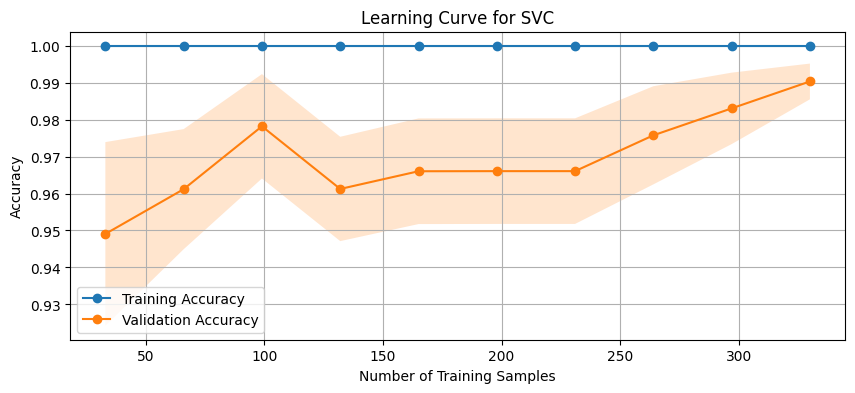

In [126]:
from sklearn.model_selection import learning_curve
#import learningcurve
train_sizes, train_scores, valid_scores = learning_curve(svc_linear, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVC')
plt.legend()
plt.grid()
plt.show();

#### Validationn accuracy approaches 1 while no of samples increases which is a good sign

### Conclusion
#### Best SVC model is achieved with linear kernel and the classification report is displayed below

In [127]:
#Classification Report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       large       1.00      0.94      0.97        31
       small       0.97      1.00      0.99        73

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104

